In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

import pandas_profiling

In [2]:
#A1) Importing the Data

Customer_Data = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/10. Additional Practice Exercises/3. Pandas Case Study-1/Customers.csv',encoding='unicode_escape')
Customer_Data.head(5)

,Customer_ID,Gender,First_Date,First_region,First_state,First_city,Recent_Date,Last_region,Last_state,Last_city,Customer_Value,Buy_Times,Points_Earned,Points_Redeemed
0,129609144,M,20130130,West,Gujarat,Surat,20130216,West,Gujarat,Surat,2032.0,2,200.0,0.0
1,129627580,M,20130129,North,Delhi,Delhi,20130129,North,Delhi,Delhi,1709.0,1,100.0,0.0
2,130363481,M,20130221,West,Gujarat,Surat,20130221,West,Gujarat,Surat,523.0,1,10.0,0.0
3,49817480,M,20130222,West,Maharashtra,Pimpri-Chinchwad,20130222,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0
4,126343829,F,20130301,North,Delhi,Delhi,20130301,North,Delhi,Delhi,1008.0,1,60.0,0.0


In [3]:
#A2) Understand the data using different functions and attributes like shape, index,
#columns, dtypes.ndim, info(), get_dtype_counts etc. 

Customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
Customer_ID        10000 non-null int64
Gender             9986 non-null object
First_Date         10000 non-null int64
First_region       9979 non-null object
First_state        9983 non-null object
First_city         10000 non-null object
Recent_Date        10000 non-null int64
Last_region        10000 non-null object
Last_state         10000 non-null object
Last_city          10000 non-null object
Customer_Value     9964 non-null float64
Buy_Times          10000 non-null int64
Points_Earned      9979 non-null float64
Points_Redeemed    9988 non-null float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


In [4]:
Customer_Data.shape

(10000, 14)

In [5]:
##Null Data in Columns
sum(Customer_Data.isnull().sum())

121

In [6]:
 #What is percentage of missing values for customer Value variable? 
print('Percentage of Missing Value is {0}'.format((Customer_Data.Customer_Value.isnull().sum()/Customer_Data.Customer_Value.count())*100))

Percentage of Missing Value is 0.3613006824568446


In [7]:
###Create two subsets with unique and duplicate values

Unique_Customers = Customer_Data.loc[-Customer_Data.Customer_ID.duplicated()]
print('The Set of Unique Customers is {0}'.format(Unique_Customers.count()))

The Set of Unique Customers is Customer_ID        9955
Gender             9941
First_Date         9955
First_region       9934
First_state        9938
First_city         9955
Recent_Date        9955
Last_region        9955
Last_state         9955
Last_city          9955
Customer_Value     9919
Buy_Times          9955
Points_Earned      9934
Points_Redeemed    9943
dtype: int64


In [8]:
Duplicate_Customers = Customer_Data.loc[Customer_Data.Customer_ID.duplicated()]
print('The Set of Duplicated Customers is {0}'.format(Duplicate_Customers.count()))

The Set of Duplicated Customers is Customer_ID        45
Gender             45
First_Date         45
First_region       45
First_state        45
First_city         45
Recent_Date        45
Last_region        45
Last_state         45
Last_city          45
Customer_Value     45
Buy_Times          45
Points_Earned      45
Points_Redeemed    45
dtype: int64


In [9]:
#Create data set with list of customers whose customer value greater than 10000 [.loc always take Boolean Values]

Customer_Data.loc[Customer_Data.Customer_Value.apply(lambda x:x>10000)].head(5)

,Customer_ID,Gender,First_Date,First_region,First_state,First_city,Recent_Date,Last_region,Last_state,Last_city,Customer_Value,Buy_Times,Points_Earned,Points_Redeemed
14,1610085,F,20120103,North,Delhi,Delhi,20121013,North,Delhi,Delhi,10380.199,6,1189.0,0.0
15,7518872,M,20120104,North,Uttar Pradesh,Kanpur,20130123,North,Uttar Pradesh,Kanpur,14587.000,6,865.0,0.0
18,63508964,M,20120106,West,Maharashtra,Pimpri-Chinchwad,20130222,West,Maharashtra,Pimpri-Chinchwad,145472.702,36,680.0,16635.0
19,23667984,F,20120107,West,Maharashtra,Nagpur,20130313,West,Maharashtra,Nagpur,19640.700,12,268.0,2549.0
20,84634600,M,20120108,South,Karnataka,Bangalore,20130307,South,Karnataka,Bangalore,32377.602,22,1029.0,1771.0


In [10]:
#In customer table, create a new variable called “customer value segment” using
#customer value as follows. -
#- High Value Segment - > 25000
#- Medium Value Segment – Between 10000 and 25000
#- Low Value Segment – less than or equal to 10000 

ts = Customer_Data.Customer_Value
Customer_Data['Customer_Value_Segment'] = np.where((ts>25000),'High Value Segment',
                                                  np.where(((ts>10000)&(ts<25000)),'Medium_Value_Segment',
                                                          np.where((ts<=10000),'Low value Segment','Invalid')))

In [11]:
Customer_Data.head(5)

,Customer_ID,Gender,First_Date,First_region,First_state,First_city,Recent_Date,Last_region,Last_state,Last_city,Customer_Value,Buy_Times,Points_Earned,Points_Redeemed,Customer_Value_Segment
0,129609144,M,20130130,West,Gujarat,Surat,20130216,West,Gujarat,Surat,2032.0,2,200.0,0.0,Low value Segment
1,129627580,M,20130129,North,Delhi,Delhi,20130129,North,Delhi,Delhi,1709.0,1,100.0,0.0,Low value Segment
2,130363481,M,20130221,West,Gujarat,Surat,20130221,West,Gujarat,Surat,523.0,1,10.0,0.0,Low value Segment
3,49817480,M,20130222,West,Maharashtra,Pimpri-Chinchwad,20130222,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0,Low value Segment
4,126343829,F,20130301,North,Delhi,Delhi,20130301,North,Delhi,Delhi,1008.0,1,60.0,0.0,Low value Segment


In [12]:
#8. How many days between last purchase date and today? 

First_Entry = pd.to_datetime(Customer_Data.First_Date,format ='%Y%m%d')
Secomd_Entry = pd.to_datetime(Customer_Data.Recent_Date,format= '%Y%m%d')
import datetime as dt
Days = (Secomd_Entry-First_Entry).dt.days
Customer_Data['Frequency']= Days
Customer_Data.head(5)

,Customer_ID,Gender,First_Date,First_region,First_state,First_city,Recent_Date,Last_region,Last_state,Last_city,Customer_Value,Buy_Times,Points_Earned,Points_Redeemed,Customer_Value_Segment,Frequency
0,129609144,M,20130130,West,Gujarat,Surat,20130216,West,Gujarat,Surat,2032.0,2,200.0,0.0,Low value Segment,17
1,129627580,M,20130129,North,Delhi,Delhi,20130129,North,Delhi,Delhi,1709.0,1,100.0,0.0,Low value Segment,0
2,130363481,M,20130221,West,Gujarat,Surat,20130221,West,Gujarat,Surat,523.0,1,10.0,0.0,Low value Segment,0
3,49817480,M,20130222,West,Maharashtra,Pimpri-Chinchwad,20130222,West,Maharashtra,Pimpri-Chinchwad,5132.0,1,170.0,0.0,Low value Segment,0
4,126343829,F,20130301,North,Delhi,Delhi,20130301,North,Delhi,Delhi,1008.0,1,60.0,0.0,Low value Segment,0


In [13]:
#Calculate percentage of sales by each last city, state and region

Customer_Data['Percentage_Sales'] = (Customer_Data.Customer_Value/Customer_Data.Customer_Value.sum())*100
temp = Customer_Data.groupby(by=['Last_region','Last_state','Last_city'])
Final_Status = temp[['Percentage_Sales']].apply(lambda x:x.sum())
Final_Status.reset_index()

,Last_region,Last_state,Last_city,Percentage_Sales
0,East,Assam,Guwahati,1.557344
1,East,Bihar,Begusarai,0.020559
2,East,Bihar,Bhagalpur,0.002230
3,East,Bihar,Katihar,0.046883
4,East,Bihar,Patna,0.185101
...,...,...,...,...
111,West,Maharashtra,Navi Mumbai,0.010617
112,West,Maharashtra,Pimpri-Chinchwad,3.314578
113,West,Maharashtra,Thane,0.237204
114,West,Maharashtra,Ulhasnagar,0.005667


In [14]:
#10. What is the count of customers, average number of purchases and average purchase transaction value by last state and city.

temp = Customer_Data.groupby(by=['Last_state','Last_city'])
value = temp[['Customer_Value','Buy_Times']].apply(lambda x:x.mean()).add_prefix('Avg_of_')
value.reset_index()

,Last_state,Last_city,Avg_of_Customer_Value,Avg_of_Buy_Times
0,Andhra Pradesh,Guntur,0.000000,3.000000
1,Andhra Pradesh,Kurnool,3113.499000,4.000000
2,Andhra Pradesh,Tirupati,9250.000000,6.000000
3,Andhra Pradesh,Vijayawada,24670.100100,10.100000
4,Andhra Pradesh,Visakhapatnam,11135.137740,4.666667
...,...,...,...,...
111,West Bengal,Kolkata,12853.575301,6.046041
112,West Bengal,North Dumdum,9514.733333,3.333333
113,West Bengal,Panihati,6923.003000,7.000000
114,West Bengal,Rajpur Sonarpur,1083.000000,2.000000


### Pandas Basic Assignment 2 - Data Manipulation

In [69]:
Cust_Data = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/10. Additional Practice Exercises/4. Pandas Case Study-2/Cust_data.csv')
Cust_Demo = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/10. Additional Practice Exercises/4. Pandas Case Study-2/Cust_demo.csv')

In [70]:
Cust_Demo.head(5)

,ID,Location,Gender,age,Martial_Status,NumberOfDependents,Own_House,No_Years_address
0,4532,"Gandhinagar,Gujarat",0,39,Single,1.0,1,3
1,148736,"Hyderabad,Andhra Pradesh",0,52,Married,0.0,0,3
2,95965,"Shimla,Himachal Pradesh",0,62,Married,0.0,0,2
3,61759,"Srinagar,JK",0,42,Single,1.0,1,1
4,49806,"Imphal,Manipur",0,41,Single,1.0,0,3


In [71]:
print(Cust_Demo.shape,Cust_Data.shape)


(149972, 8) (149902, 10)


In [72]:
#Create sub set of cust_demo as “cust_s1” with ID, age, Gender and Location variables using the condition 
#marital_status = “Married” and Own_house = 1 and age>28. 

Cust_S1 = Cust_Demo.loc[(Cust_Demo['age']>28) & (Cust_Demo['Own_House'] !=0) & (Cust_Demo['Martial_Status'] !='Single')]
Cust_S1 = Cust_S1[['ID','age','Gender','Location']]
Cust_S1

,ID,age,Gender,Location
28,26404,33,0,"Kolkata,West Bengal"
42,137858,34,0,"Chennai,Tamil Nadu"
50,57715,39,1,"Thiruvananthapuram,Kerala"
52,76230,53,1,"Chandigarh,Haryana"
56,8493,78,1,"Ranchi,Jharkhand"
...,...,...,...,...
149867,147868,66,1,"Gandhinagar,Gujarat"
149880,130601,55,1,"Gandhinagar,Gujarat"
149910,44786,57,0,"Jammu,JK"
149931,141498,34,0,"Itanagar,Arunachal Pradesh"


In [73]:
##Sort Values based on Location Ascending & Age Descending

Cust_S1 = Cust_S1.sort_values(by=['Location','age'],ascending= [True,False]).reset_index(drop=True)
Cust_S1

,ID,age,Gender,Location
0,106073,90,1,"Agartala,Tripura"
1,8967,88,1,"Agartala,Tripura"
2,44249,87,1,"Agartala,Tripura"
3,28287,86,0,"Agartala,Tripura"
4,60165,85,0,"Agartala,Tripura"
...,...,...,...,...
16451,124047,29,0,"Thiruvananthapuram,Kerala"
16452,68462,29,1,"Thiruvananthapuram,Kerala"
16453,83153,29,1,"Thiruvananthapuram,Kerala"
16454,22876,29,1,"Thiruvananthapuram,Kerala"


In [74]:
## Rename Column

Cust_Demo = Cust_Demo.rename(columns={'NumberOfDependents':'No_of_dependents'})
Cust_Demo

,ID,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address
0,4532,"Gandhinagar,Gujarat",0,39,Single,1.0,1,3
1,148736,"Hyderabad,Andhra Pradesh",0,52,Married,0.0,0,3
2,95965,"Shimla,Himachal Pradesh",0,62,Married,0.0,0,2
3,61759,"Srinagar,JK",0,42,Single,1.0,1,1
4,49806,"Imphal,Manipur",0,41,Single,1.0,0,3
...,...,...,...,...,...,...,...,...
149967,130863,"Chandigarh,Haryana",0,41,Single,0.0,0,1
149968,29796,"Imphal,Manipur",1,51,Single,0.0,1,2
149969,120617,"Raipur,Chhattisgarh",1,40,Married,0.0,0,1
149970,39555,"Gangtok,Sikkim",0,49,Single,1.0,0,2


In [75]:
## Remove Duplicates

Cust_Demo = Cust_Demo.loc[-Cust_Demo.duplicated()]
Cust_Demo

,ID,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address
0,4532,"Gandhinagar,Gujarat",0,39,Single,1.0,1,3
1,148736,"Hyderabad,Andhra Pradesh",0,52,Married,0.0,0,3
2,95965,"Shimla,Himachal Pradesh",0,62,Married,0.0,0,2
3,61759,"Srinagar,JK",0,42,Single,1.0,1,1
4,49806,"Imphal,Manipur",0,41,Single,1.0,0,3
...,...,...,...,...,...,...,...,...
149951,130863,"Chandigarh,Haryana",0,41,Single,0.0,0,1
149952,29796,"Imphal,Manipur",1,51,Single,0.0,1,2
149953,120617,"Raipur,Chhattisgarh",1,40,Married,0.0,0,1
149954,39555,"Gangtok,Sikkim",0,49,Single,1.0,0,2


In [76]:
Cust_Data.head(5)

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD
0,83236,0,0.311726,0,0.296409,11500.0,12,0,3,0
1,2503,0,0.124988,0,0.115903,14166.0,13,0,1,0
2,137013,0,0.060258,0,0.515147,6733.0,7,0,3,0
3,51306,0,0.064322,0,0.165127,13316.0,10,0,1,0
4,71937,0,0.211186,0,0.022283,2557.0,3,0,0,0


In [77]:
Cust_Data['No_of_30_plus_DPD'] = Cust_Data['No_of_30_59_DPD'] + Cust_Data['No_of_90_DPD'] + Cust_Data['No_of_60_89_DPD']

In [80]:
Cust_Data['No_of_60_plus_DPD'] = Cust_Data['No_of_90_DPD'] +  Cust_Data['No_of_60_89_DPD']

In [83]:
cust_leftjoin = pd.merge(left= Cust_Data,right= Cust_Demo,left_on=['ID'],right_on=['ID'],how='left',indicator=True)
cust_leftjoin.head(5)

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,No_of_30_plus_DPD,No_of_60_plus_DPD,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address,_merge
0,83236,0,0.311726,0,0.296409,11500.0,12,0,3,0,0,0,"Raipur,Chhattisgarh",0.0,46.0,Single,2.0,1.0,3.0,both
1,2503,0,0.124988,0,0.115903,14166.0,13,0,1,0,0,0,"Itanagar,Arunachal Pradesh",1.0,57.0,Single,2.0,0.0,3.0,both
2,137013,0,0.060258,0,0.515147,6733.0,7,0,3,0,0,0,"Chandigarh,Haryana",0.0,56.0,Married,0.0,1.0,1.0,both
3,51306,0,0.064322,0,0.165127,13316.0,10,0,1,0,0,0,"Aizawl,Mizoram",0.0,56.0,Single,2.0,0.0,1.0,both
4,71937,0,0.211186,0,0.022283,2557.0,3,0,0,0,0,0,"Chandigarh,Haryana",1.0,24.0,Single,0.0,0.0,1.0,both


In [86]:
cust_rightjoin = pd.merge(left= Cust_Data,right= Cust_Demo,left_on=['ID'],right_on=['ID'],how='right',indicator=True)
cust_rightjoin.head(5)

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,No_of_30_plus_DPD,No_of_60_plus_DPD,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address,_merge
0,83236,0.0,0.311726,0.0,0.296409,11500.0,12.0,0.0,3.0,0.0,0.0,0.0,"Raipur,Chhattisgarh",0,46,Single,2.0,1,3,both
1,2503,0.0,0.124988,0.0,0.115903,14166.0,13.0,0.0,1.0,0.0,0.0,0.0,"Itanagar,Arunachal Pradesh",1,57,Single,2.0,0,3,both
2,137013,0.0,0.060258,0.0,0.515147,6733.0,7.0,0.0,3.0,0.0,0.0,0.0,"Chandigarh,Haryana",0,56,Married,0.0,1,1,both
3,51306,0.0,0.064322,0.0,0.165127,13316.0,10.0,0.0,1.0,0.0,0.0,0.0,"Aizawl,Mizoram",0,56,Single,2.0,0,1,both
4,71937,0.0,0.211186,0.0,0.022283,2557.0,3.0,0.0,0.0,0.0,0.0,0.0,"Chandigarh,Haryana",1,24,Single,0.0,0,1,both


In [87]:
cust_innerjoin = pd.merge(left= Cust_Data,right= Cust_Demo,left_on=['ID'],right_on=['ID'],how='inner',indicator=True)
cust_innerjoin.head(5)

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,No_of_30_plus_DPD,No_of_60_plus_DPD,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address,_merge
0,83236,0,0.311726,0,0.296409,11500.0,12,0,3,0,0,0,"Raipur,Chhattisgarh",0,46,Single,2.0,1,3,both
1,2503,0,0.124988,0,0.115903,14166.0,13,0,1,0,0,0,"Itanagar,Arunachal Pradesh",1,57,Single,2.0,0,3,both
2,137013,0,0.060258,0,0.515147,6733.0,7,0,3,0,0,0,"Chandigarh,Haryana",0,56,Married,0.0,1,1,both
3,51306,0,0.064322,0,0.165127,13316.0,10,0,1,0,0,0,"Aizawl,Mizoram",0,56,Single,2.0,0,1,both
4,71937,0,0.211186,0,0.022283,2557.0,3,0,0,0,0,0,"Chandigarh,Haryana",1,24,Single,0.0,0,1,both


In [90]:
cust_fulljoin = pd.merge(left= Cust_Data,right= Cust_Demo,left_on=['ID'],right_on=['ID'],how='outer',indicator=True)
cust_fulljoin.head(5)

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,No_of_30_plus_DPD,No_of_60_plus_DPD,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address,_merge
0,83236,0.0,0.311726,0.0,0.296409,11500.0,12.0,0.0,3.0,0.0,0.0,0.0,"Raipur,Chhattisgarh",0.0,46.0,Single,2.0,1.0,3.0,both
1,2503,0.0,0.124988,0.0,0.115903,14166.0,13.0,0.0,1.0,0.0,0.0,0.0,"Itanagar,Arunachal Pradesh",1.0,57.0,Single,2.0,0.0,3.0,both
2,137013,0.0,0.060258,0.0,0.515147,6733.0,7.0,0.0,3.0,0.0,0.0,0.0,"Chandigarh,Haryana",0.0,56.0,Married,0.0,1.0,1.0,both
3,51306,0.0,0.064322,0.0,0.165127,13316.0,10.0,0.0,1.0,0.0,0.0,0.0,"Aizawl,Mizoram",0.0,56.0,Single,2.0,0.0,1.0,both
4,71937,0.0,0.211186,0.0,0.022283,2557.0,3.0,0.0,0.0,0.0,0.0,0.0,"Chandigarh,Haryana",1.0,24.0,Single,0.0,0.0,1.0,both


In [96]:
Data_Set1 = Cust_Demo.sample(frac=0.05)
Data_Set1.head()

,ID,Location,Gender,age,Martial_Status,No_of_dependents,Own_House,No_Years_address
68878,105097,"Mumbai,Maharashtra",0,52,Single,0.0,1,3
145413,65635,"Chandigarh,Haryana",1,43,Single,3.0,0,2
36452,75549,"Kohima,Nagaland",1,45,Single,3.0,1,3
38859,88592,"Chennai,Tamil Nadu",0,46,Married,0.0,1,2
57998,55812,"Thiruvananthapuram,Kerala",1,67,Single,NaN,0,2


In [101]:
Data_Set2 = Cust_Data.sample(n=10000,random_state=0)
Data_Set2.head()

,ID,SeriousDlqin2yrs,RevolvingUtilization,No_of_30_59_DPD,DebtRatio,MonthlyIncome,No_Of_OpenCreditLines,No_of_90_DPD,No_of_RealEstateLoans,No_of_60_89_DPD,No_of_30_plus_DPD,No_of_60_plus_DPD
128778,114336,0,0.024871,0,0.007666,9000.0,10,0,0,0,0,0
10007,97807,0,0.538596,0,0.284034,3400.0,11,0,1,0,0,0
134871,134523,0,0.019371,1,0.000888,2252.0,2,0,0,0,1,0
4022,108742,0,0.062533,0,0.464867,6446.0,11,0,2,0,0,0
142859,116934,0,0.855008,0,1546.000000,NaN,12,0,0,0,0,0


In [115]:
print('Number of Customers: ',cust_leftjoin.ID.count())
vs = [x for x in cust_leftjoin.Martial_Status]
count = 0
for x in vs:
    if(x=='Married'):
        count +=1
print('Number of Married Customers:',count)

Number of Customers:  149902
Number of Married Customers: 42819


In [116]:
import pandas_profiling

In [117]:
pandas_profiling.ProfileReport(Cust_Data)

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,149902
Total Missing (%),1.7%
Total size in memory,13.7 MiB
Average record size in memory,96.0 B
Numeric,7
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,4


## Mobile Number Validation

In [29]:
import re

n = int(input())
list_val = []
for x in range(0,n):
    list_val.append(str(input()))

for x in list_val:
    if (len(x)==10):
        if(bool(re.findall('[a-zA-Z]',x))==False):
            if(list(x)[0] in ['7','8','9']):
                print('YES')
            else:
                print('NO')
        else:
            print('NO')
        
    else:
        print('NO')
        

2
798025531A
7980255311
NO
YES


In [28]:
x ='7980255311'
bool(re.findall('[A-Z]',x))

False

### Retail Case Study - Practice Sesssion 1

In [32]:
Customers = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
Transaction = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')
prod_cat_info = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')

In [34]:
Transaction.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [35]:
Customers.head(5)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [37]:
prod_cat_info.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [41]:
table_1 = pd.merge(left=Transaction,right=prod_cat_info,left_on=['prod_cat_code'],right_on=['prod_cat_code'],how='inner',indicator=True)

In [44]:
Customer_Final = pd.merge(left=table_1,right=Customers,left_on=['cust_id'],right_on=['customer_Id'],how='inner',indicator=False)
Customer_Final.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,_merge,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,4,Mens,both,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women,both,270351,26-09-1981,M,5.0
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,3,Kids,both,270351,26-09-1981,M,5.0
3,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,Clothing,4,Mens,both,270351,26-09-1981,M,5.0
4,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,Clothing,1,Women,both,270351,26-09-1981,M,5.0


In [49]:
## Prepare a summary report for the merged data set

pandas_profiling.ProfileReport(Customer_Final)

C:\Users\abhis\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,18
Number of observations,99293
Total Missing (%),0.0%
Total size in memory,13.7 MiB
Average record size in memory,145.0 B
Numeric,10
Categorical,7
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [50]:
## Prepare a summary report for the merged data set
##(1) Get the column names and their corresponding data types
##(2) Top/Bottom 10 observations
##(3) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [51]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 18 columns):
transaction_id       99293 non-null int64
cust_id              99293 non-null int64
tran_date            99293 non-null object
prod_subcat_code     99293 non-null int64
prod_cat_code        99293 non-null int64
Qty                  99293 non-null int64
Rate                 99293 non-null int64
Tax                  99293 non-null float64
total_amt            99293 non-null float64
Store_type           99293 non-null object
prod_cat             99293 non-null object
prod_sub_cat_code    99293 non-null int64
prod_subcat          99293 non-null object
_merge               99293 non-null category
customer_Id          99293 non-null int64
DOB                  99293 non-null object
Gender               99253 non-null object
city_code            99257 non-null float64
dtypes: category(1), float64(3), int64(8), object(6)
memory usage: 13.7+ MB


In [59]:
Continous_var = Customer_Final.select_dtypes(include=['int64','float64'])

In [67]:
def Continous_Var_Summary(x):
    return pd.Series([x.count(),x.min(),x.max(),x.quantile(0.01),x.quantile(0.75)],
                      index=['Count','Minimum','Maximum','Q1','Q3'])

In [69]:
Continous_var.apply(Continous_Var_Summary).T

,Count,Minimum,Maximum,Q1,Q3
transaction_id,99293.0,3268991.000,9.998755e+10,9.465463e+08,7.528121e+10
cust_id,99293.0,266783.000,2.752650e+05,2.668700e+05,2.731200e+05
prod_subcat_code,99293.0,1.000,1.200000e+01,1.000000e+00,1.000000e+01
prod_cat_code,99293.0,1.000,6.000000e+00,1.000000e+00,5.000000e+00
Qty,99293.0,-5.000,5.000000e+00,-5.000000e+00,4.000000e+00
Rate,99293.0,-1499.000,1.500000e+03,-1.361000e+03,1.109000e+03
Tax,99293.0,7.350,7.875000e+02,1.407000e+01,3.669750e+02
total_amt,99293.0,-8270.925,8.287500e+03,-5.763680e+03,3.585725e+03
prod_sub_cat_code,99293.0,1.000,1.200000e+01,1.000000e+00,1.000000e+01
customer_Id,99293.0,266783.000,2.752650e+05,2.668700e+05,2.731200e+05


In [77]:
Categorical_Var = Customer_Final.select_dtypes(include=['object'])
Categorical_Var.head(5)

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
0,28-02-2014,e-Shop,Clothing,Mens,26-09-1981,M
1,28-02-2014,e-Shop,Clothing,Women,26-09-1981,M
2,28-02-2014,e-Shop,Clothing,Kids,26-09-1981,M
3,20-02-2014,e-Shop,Clothing,Mens,26-09-1981,M
4,20-02-2014,e-Shop,Clothing,Women,26-09-1981,M


In [114]:
# Create Data audit Report for categorical variables

def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [125]:
cat_var = Categorical_Var.apply(categorical_var_summary)
cat_var

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
N,99293,99293,99293,99293,99293,99253
NMISS,0,0,0,0,0,40
MODE,25-08-2012,e-Shop,Books,Women,27-12-1988,M
FREQ,153,40185,36414,7957,156,51051
PERCENT,0.15,40.47,36.67,8.01,0.16,51.44


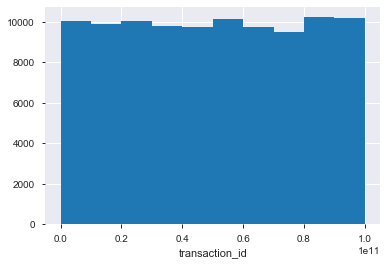

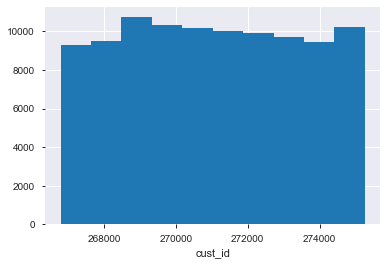

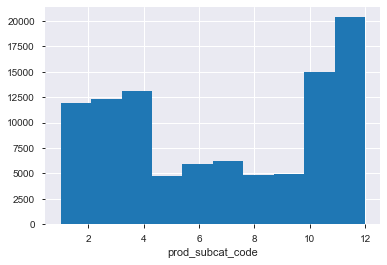

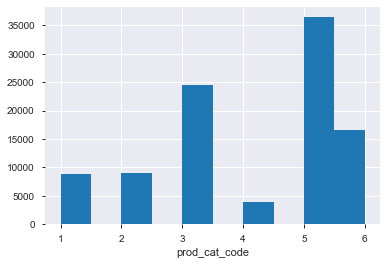

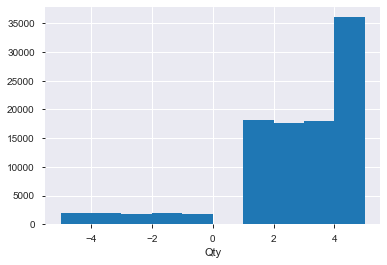

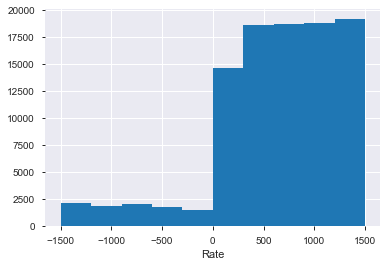

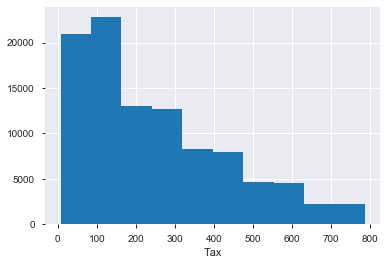

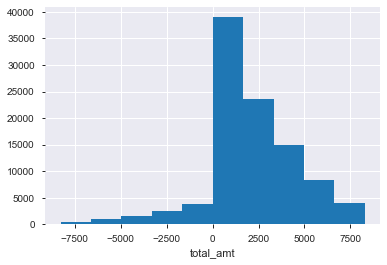

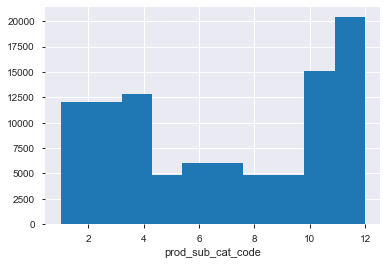

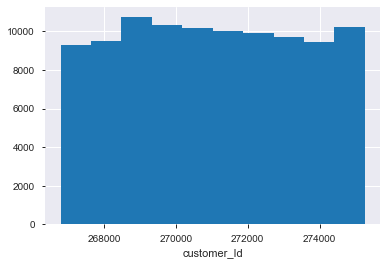

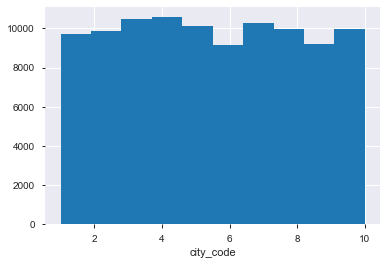

In [123]:
## Generate histograms for all continuous variables and frequency bars for categorical variables
for x in Continous_var.columns:
    Continous_var[x].hist()
    plt.xlabel(str(x))
    plt.show()

In [129]:
cat_var.columns.T

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

In [131]:
 #Calculate the following information using the merged dataset :
    #a. Time period of the available transaction data
    #b. Count of transactions where the total amount of transaction was negative   

In [145]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final.tran_date)
Customer_Final['tran_date'] = Customer_Final['tran_date'].dt.strftime('%Y-%m-%d %H:%M')

In [158]:
 #a. Time period of the available transaction data

Min = pd.to_datetime(Customer_Final.tran_date.min())
Max = pd.to_datetime(Customer_Final.tran_date.max())

Total_Numer_Of_Days = Max-Min
Total_Numer_Of_Days

Timedelta('1430 days 00:00:00')

In [165]:
#b. Count of transactions where the total amount of transaction was negative

count1 = 0
count2 = 0
for x in Customer_Final.Qty:
    if(x<0):
        count1+=1
    else:
        count2+=1
print('Total Negative Txn Amount is {} and Positive Txn amount is {}:'.format(count1,count2))
    

Total Negative Txn Amount is 9294 and Positive Txn amount is 89999:


In [193]:
# Analyze which product categories are more popular among females vs male customers.

ts = Customer_Final.groupby(by=['Gender','prod_cat'])
var = ts[['prod_cat_code']].count().reset_index()
bs = var.groupby(by=['Gender'])
bs[['prod_cat_code','prod_cat']].max().reset_index()

,Gender,prod_cat_code,prod_cat
0,F,17694,Home and kitchen
1,M,18696,Home and kitchen


In [256]:
#Which City code has the maximum customers and what was the percentage of customers from that city?

ts = Customer_Final.groupby(by=['city_code'])
val_list = pd.DataFrame((ts[['cust_id']].count().add_prefix('Count_of_').reset_index()).apply(lambda x:max(x)))
val_list = val_list.rename(columns={0:'Max_Value'})
val_list = val_list.T
val_list['Percentage'] = (val_list.Count_of_cust_id/Customer_Final.cust_id.count())*100
val_list

,city_code,Count_of_cust_id,Percentage
Max_Value,10.0,10571.0,10.646269


In [264]:
# Which store type sells the maximum products by value and by quantity?

ts = Customer_Final.groupby(by=['Store_type'])
(ts[['Qty','Rate']].max()).reset_index()

,Store_type,Qty,Rate
0,Flagship store,5,1500
1,MBR,5,1500
2,TeleShop,5,1500
3,e-Shop,5,1500


In [288]:
# What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores ?

a = (Customer_Final.loc[Customer_Final.Store_type =='Flagship store'])
a= a.reset_index()
ts = a.groupby(by=['prod_cat'])
b= ((ts[['Rate']].sum()).reset_index())
b

,prod_cat,Rate
0,Bags,522984
1,Books,4632402
2,Clothing,1077309
3,Electronics,3266305
4,Footwear,1096677
5,Home and kitchen,2120300


In [299]:
#What was the total amount earned from "Male" customers under the "Electronics" category?

ts = Customer_Final.groupby(by=['prod_cat','Gender'])
val = ((ts[['total_amt']].sum().reset_index()))
val.loc[(val['prod_cat']=='Electronics') & (val['Gender']=='M')].reset_index()

,index,prod_cat,Gender,total_amt
0,7,Electronics,M,2.851555e+07


In [316]:
# How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

Positive_Customer_Final = Customer_Final.loc[(Customer_Final.total_amt>0)]
val = Positive_Customer_Final.groupby(by=['cust_id']).agg({'transaction_id':pd.Series.nunique}).reset_index()
val.loc[val.transaction_id.apply(lambda x:x>10)].reset_index()

,index,cust_id,transaction_id
0,4,266794,11
1,2426,270535,11
2,2606,270803,11
3,3867,272741,11
4,4032,273014,11
5,4815,274227,11


## Credit Card Case Study - Practice Session 1

In [318]:
Customer_Acquisition = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
Spend = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv')
Repayment = pd.read_csv('H:/Machine Learning/1. Pandas Assignments/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv')

In [319]:
 #In case age is less than 18, replace it with mean of age values.
    
Customer_Acquisition.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [320]:
Spend.head(5)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [321]:
Repayment.head(5)

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,03-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [355]:
a = pd.merge(left=Customer_Acquisition,right=Spend,left_on='Customer',right_on='Customer',how='inner')
Customer_Final  = pd.merge(left=a,right=Repayment,left_on='Customer',right_on='Customer',how='inner')

In [362]:
Customer_Final.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_Spend,SL No:,Month_y,Repayment_Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,03-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88


In [357]:
Customer_Final = Customer_Final.rename(columns={'Amount_x':'Amount_Spend','Amount_y':'Repayment_Amount'})

In [358]:
 #In case age is less than 18, replace it with mean of age values
    
ts = Customer_Final.Age
Customer_Final['Age'] = np.where(ts<18,ts.mean(),Customer_Final['Age'])

In [359]:
#In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

ts = Customer_Final.Amount_Spend
Customer_Final['Amount_Spend'] = np.where(ts>Customer_Final.Limit,0.5*ts,Customer_Final['Amount_Spend'])

In [360]:
 #Incase the repayment amount is more than the limit, replace the repayment with the limit.
ts = Customer_Final.Repayment_Amount
Customer_Final['Repayment_Amount'] = np.where(ts>Customer_Final.Limit,Customer_Final.Limit,Customer_Final.Repayment_Amount)

In [372]:
count = 0
for x  in (set(Customer_Final.Customer)):  
    count +=1
    
print('Total distinct customers is {}'.format(count))

Total distinct customers is 100


In [374]:
count = 0
for x  in (set(Customer_Final.Type)): 
    print(x)
    count +=1
    
print('Total distinct Categories is {}'.format(count))

PETRO
BIKE
RENTAL
AUTO
MOVIE TICKET
AIR TICKET
CAR
TRAIN TICKET
SANDALS
CLOTHES
CAMERA
JEWELLERY
SHOPPING
FOOD
BUS TICKET
Total distinct Categories is 15


In [387]:
ts = Customer_Final.groupby(by=['Customer','Month_x'])
ts[['Amount_Spend']].mean().reset_index()

,Customer,Month_x,Amount_Spend
0,A1,1-Feb-05,23370.20
1,A1,12-Jan-04,463017.01
2,A1,15-Jan-04,23740.46
3,A1,17-Jan-05,369694.07
4,A1,19-Apr-06,346925.68
...,...,...,...
1252,A95,15-Jan-04,240401.50
1253,A96,25-Jan-04,54729.66
1254,A97,12-Jan-04,69509.13
1255,A98,3-Jan-04,142260.53


In [388]:
ts = Customer_Final.groupby(by=['Customer','Month_y'])
ts[['Repayment_Amount']].mean().reset_index()

,Customer,Month_y,Repayment_Amount
0,A1,01-Apr-06,429099.97
1,A1,01-Feb-05,14473.41
2,A1,03-Jan-04,245899.02
3,A1,03-Jul-05,297176.74
4,A1,03-Sep-06,186427.50
...,...,...,...
1276,A95,15-Jan-04,369405.96
1277,A96,25-Jan-04,100000.00
1278,A97,12-Jan-04,10000.00
1279,A98,03-Jan-04,10001.00


In [401]:
Customer_Final['Profit'] = Customer_Final.Repayment_Amount-Customer_Final.Amount_Spend
ts= Customer_Final.Profit
Customer_Final['Profit'] = np.where(ts>0,round(ts+ts*0.029,2),0)

In [418]:
Customer_Final.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_Spend,SL No:,Month_y,Repayment_Amount,Profit
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,NaN,12-Jan-04,495414.75,10232.32
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,03-Jan-04,245899.02,0.00
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,15-Jan-04,259490.06,0.00
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,4.0,25-Jan-04,437555.12,0.00
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,5.0,17-Jan-05,165972.88,0.00


In [407]:
### f. What are the top 5 product types?

a = Customer_Final['Product'].groupby(by=Customer_Final['Type']).value_counts()
a.groupby(level=[0,1]).nlargest(1)

Type          Product 
AIR TICKET    Gold        1803
              Platimum    1200
              Silver       534
AUTO          Platimum     509
              Gold         335
              Silver       127
BIKE          Platimum     714
              Gold         406
              Silver       135
BUS TICKET    Gold        1114
              Platimum     954
              Silver       349
CAMERA        Gold        2096
              Platimum    1286
              Silver       855
CAR           Platimum     339
              Gold         235
              Silver       108
CLOTHES       Platimum     931
              Gold         898
              Silver       414
FOOD          Platimum    1784
              Gold        1612
              Silver       660
JEWELLERY     Platimum    1072
              Gold         850
              Silver       459
MOVIE TICKET  Platimum     693
              Gold         665
              Silver       462
PETRO         Gold        2151
              Pl

In [414]:
# Which city is having maximum spend?

ts = Customer_Final.groupby(by=['City'])
pd.DataFrame((ts[['Amount_Spend']].sum().reset_index()).apply(lambda x:max(x)))

,0
City,TRIVANDRUM
Amount_Spend,1.45726e+09


In [419]:
#Which age group is spending more money?

ts = Customer_Final.groupby(by=['Segment'])
pd.DataFrame((ts[['Amount_Spend']].sum().reset_index()).apply(lambda x:max(x)))

,0
Segment,Self Employed
Amount_Spend,1.80375e+09


In [432]:
# Who are the top 10 customers in terms of repayment?


val = Customer_Final.sort_values(by=['Repayment_Amount'],ascending=False)
ts = val.groupby(by=['Customer'])
((ts[['Repayment_Amount']].sum()).reset_index()).sort_values(by=['Repayment_Amount'],ascending=False).head(10)

,Customer,Repayment_Amount
58,A61,4.004874e+08
57,A60,3.752990e+08
5,A13,2.967320e+08
38,A43,2.631860e+08
40,A45,2.618984e+08
4,A12,2.583776e+08
6,A14,2.462413e+08
39,A44,2.400866e+08
33,A39,2.362970e+08
37,A42,2.360793e+08
